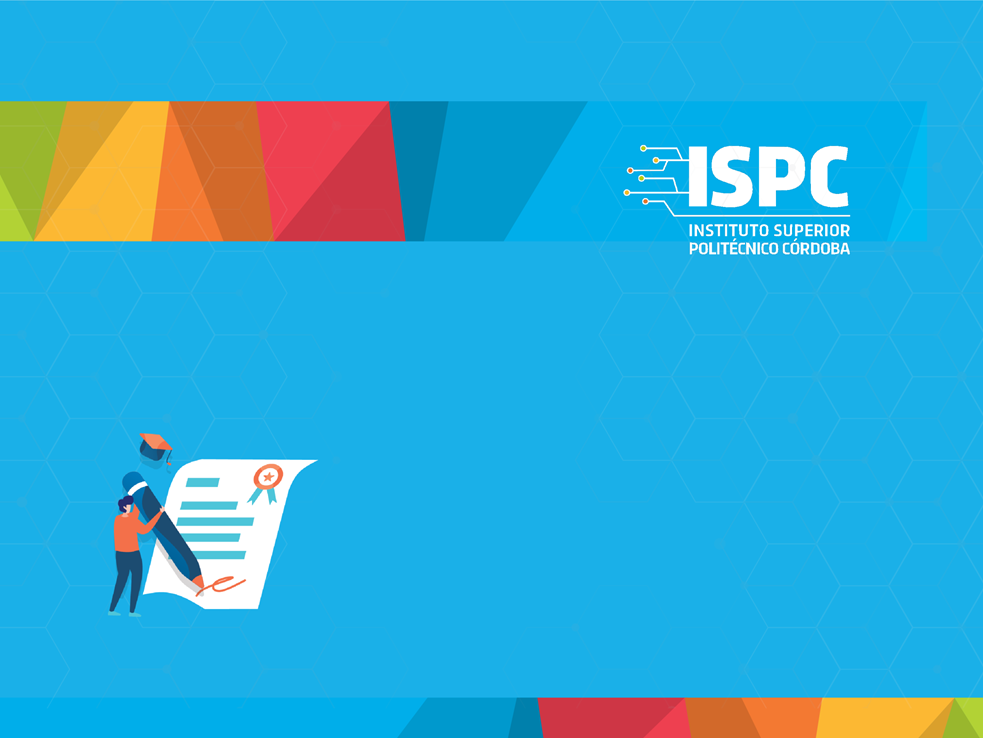

# Ejemplo de WebScraping con Python
## Obtener cotizaciones de la bolsa de Madrid

In [17]:
!pip install BeautifulSoup4


In [1]:
# import libraries
import requests
from bs4 import BeautifulSoup
import csv
from datetime import datetime

In [2]:
# indicar la ruta
url_page = 'http://www.bolsamadrid.es/esp/aspx/Indices/Resumen.aspx'

In [3]:
# tarda 480 milisegundos
page = requests.get(url_page).text 
soup = BeautifulSoup(page, "lxml")

In [8]:
# Obtenemos la tabla por un ID específico
tabla = soup.find('table', attrs={'id': 'ctl00_Contenido_tblÍndices'})
tabla


<table align="Center" cellpadding="3" cellspacing="0" class="TblPort" id="ctl00_Contenido_tblÍndices" style="margin-bottom: 20px;" width="85%">
<tr align="center">
<th scope="col">Nombre</th><th scope="col">Anterior</th><th scope="col">Último</th><th scope="col">% Dif.</th><th scope="col">Máximo</th><th scope="col">Mínimo</th><th scope="col">Fecha</th><th scope="col">Hora</th><th class="Ult" scope="col">% Dif.<br/>Año 2021</th>
</tr><tr align="right">
<td align="left" class="DifFlBj">IBEX 35®</td><td>8.800,60</td><td>8.695,30</td><td class="DifClBj">-1,20</td><td>8.832,60</td><td>8.668,40</td><td align="center">10/09/2021</td><td align="center">17:38:00</td><td class="DifClSb Ult">7,70</td>
</tr><tr align="right">
<td align="left" class="DifFlBj">IBEX 35® con Dividendos</td><td>26.958,20</td><td>26.635,50</td><td class="DifClBj">-1,20</td><td>27.056,00</td><td>26.553,20</td><td align="center">10/09/2021</td><td align="center">17:38:00</td><td class="DifClSb Ult">9,78</td>
</tr><tr alig

In [9]:
print(tabla)


<table align="Center" cellpadding="3" cellspacing="0" class="TblPort" id="ctl00_Contenido_tblÍndices" style="margin-bottom: 20px;" width="85%">
<tr align="center">
<th scope="col">Nombre</th><th scope="col">Anterior</th><th scope="col">Último</th><th scope="col">% Dif.</th><th scope="col">Máximo</th><th scope="col">Mínimo</th><th scope="col">Fecha</th><th scope="col">Hora</th><th class="Ult" scope="col">% Dif.<br/>Año 2021</th>
</tr><tr align="right">
<td align="left" class="DifFlBj">IBEX 35®</td><td>8.800,60</td><td>8.695,30</td><td class="DifClBj">-1,20</td><td>8.832,60</td><td>8.668,40</td><td align="center">10/09/2021</td><td align="center">17:38:00</td><td class="DifClSb Ult">7,70</td>
</tr><tr align="right">
<td align="left" class="DifFlBj">IBEX 35® con Dividendos</td><td>26.958,20</td><td>26.635,50</td><td class="DifClBj">-1,20</td><td>27.056,00</td><td>26.553,20</td><td align="center">10/09/2021</td><td align="center">17:38:00</td><td class="DifClSb Ult">9,78</td>
</tr><tr alig

In [18]:
name=""
price=""
nroFila=0 # Flag se utiliza lara tener visibilidad de las iteraciones
# DEFINO ARRAY DONDE GUARDAR LOS DATOS DE CADA ITERACION
array=[]

for fila in tabla.find_all('tr'):
    # for row in  tabla.find_all("td")::
    nroCelda=0
    for celda in fila.find_all('td'):
        if nroCelda==0:
            name=celda.text
            print("Indice:", name)
        if nroCelda==2:
            price=celda.text
            print("Valor:", price)
        nroCelda=nroCelda+1 # FLAG que incrementa la celda
    nroFila=nroFila+1 # Flag que incrementa la fila 
    # AGREGO/GUARDO LOS DATOS EN FORMATO DICCIONARIO EN EL ARRAY.
    array.append({"name": name, "price": price})

Indice: IBEX 35®
Valor: 8.695,30
Indice: IBEX 35® con Dividendos
Valor: 26.635,50
Indice: IBEX MEDIUM CAP®
Valor: 13.400,50
Indice: IBEX SMALL CAP®
Valor: 8.407,20
Indice: IBEX 35® Bancos
Valor: 484,20
Indice: IBEX 35® Energía
Valor: 1.249,10
Indice: IBEX 35® Construcción
Valor: 1.434,00
Indice: IBEX TOP Dividendo®
Valor: 2.437,60
Indice: IBEX 35® con Dividendos Netos
Valor: 22.293,30
Indice: IBEX 35® Inverso
Valor: 2.232,10
Indice: IBEX 35® Doble Inverso
Valor: 249,80
Indice: IBEX 35® Inverso X3
Valor: 10.472,90
Indice: IBEX 35® Inverso X5
Valor: 1.191,10
Indice: IBEX 35® Inverso X10
Valor: 35,40
Indice: IBEX 35® Doble Apalancado
Valor: 3.994,80
Indice: IBEX 35® Doble Apalancado Bruto
Valor: 18.799,80
Indice: IBEX 35® Doble Apalancado Neto
Valor: 15.635,40
Indice: IBEX 35® Apalancado X3
Valor: 548,50
Indice: IBEX 35® Apalancado Neto X3
Valor: 6.498,00
Indice: IBEX 35® Apalancado Neto X5
Valor: 354,10
Indice: IBEX 35® Apalancado Neto X10
Valor: 331,90
Indice: IBEX 35® Capped Net Return

In [30]:
# VEO COMO SE CREO EL ARRAY
array

[{'name': '', 'price': ''},
 {'name': 'IBEX 35®', 'price': '8.695,30'},
 {'name': 'IBEX 35® con Dividendos', 'price': '26.635,50'},
 {'name': 'IBEX MEDIUM CAP®', 'price': '13.400,50'},
 {'name': 'IBEX SMALL CAP®', 'price': '8.407,20'},
 {'name': 'IBEX 35® Bancos', 'price': '484,20'},
 {'name': 'IBEX 35® Energía', 'price': '1.249,10'},
 {'name': 'IBEX 35® Construcción', 'price': '1.434,00'},
 {'name': 'IBEX TOP Dividendo®', 'price': '2.437,60'},
 {'name': 'IBEX 35® con Dividendos Netos', 'price': '22.293,30'},
 {'name': 'IBEX 35® Inverso', 'price': '2.232,10'},
 {'name': 'IBEX 35® Doble Inverso', 'price': '249,80'},
 {'name': 'IBEX 35® Inverso X3', 'price': '10.472,90'},
 {'name': 'IBEX 35® Inverso X5', 'price': '1.191,10'},
 {'name': 'IBEX 35® Inverso X10', 'price': '35,40'},
 {'name': 'IBEX 35® Doble Apalancado', 'price': '3.994,80'},
 {'name': 'IBEX 35® Doble Apalancado Bruto', 'price': '18.799,80'},
 {'name': 'IBEX 35® Doble Apalancado Neto', 'price': '15.635,40'},
 {'name': 'IBEX 3

In [29]:
# Abrimos el csv con open para que pueda agregar contenidos al final del archivo
# agrego el parametro newline="" para que no haga un salto de linea 
with open('bolsa_ibex35.csv', 'a', newline="") as csv_file: # Abro/Creo archivo CSV al que llamare csv_file dentro de python
    writer = csv.writer(csv_file) # Determino que voy a escribir el archivo
    for row in array : # Recorro el diccionario linea por linea.
        #print(row['name'])
        
        if(row['name'] != ""): # Como el primer registro es null y no quiero que se escriba en el CSV con IF salteo ese registro
            writer.writerow([row['name'], row['price'], datetime.now()])
        
        


IBEX 35®
IBEX 35® con Dividendos
IBEX MEDIUM CAP®
IBEX SMALL CAP®
IBEX 35® Bancos
IBEX 35® Energía
IBEX 35® Construcción
IBEX TOP Dividendo®
IBEX 35® con Dividendos Netos
IBEX 35® Inverso
IBEX 35® Doble Inverso
IBEX 35® Inverso X3
IBEX 35® Inverso X5
IBEX 35® Inverso X10
IBEX 35® Doble Apalancado
IBEX 35® Doble Apalancado Bruto
IBEX 35® Doble Apalancado Neto
IBEX 35® Apalancado X3
IBEX 35® Apalancado Neto X3
IBEX 35® Apalancado Neto X5
IBEX 35® Apalancado Neto X10
IBEX 35® Capped Net Return
IBEX 35® Impacto Div
IBEX 35® Volatilidad Objetivo 10% Estándar
IBEX 35® Volatilidad Objetivo 12% Estándar
IBEX 35® Volatilidad Objetivo 15% Estándar
IBEX 35® Volatilidad Objetivo 18% Estándar
IBEX 35® Volatilidad Objetivo 10% Financiado
IBEX 35® Volatilidad Objetivo 12% Financiado
IBEX 35® Volatilidad Objetivo 15% Financiado
IBEX 35® Volatilidad Objetivo 18% Financiado
VIBEX®
IBEX 35® Skew
IBEX 35® BuyWrite
IBEX 35® PutWrite
IBEX 35® Protective Put
IBEX 35® Venta de Strangle
IBEX TOP Dividendo® Re

In [34]:
# importar libreria de panda para trabajar con datos tabulados
import pandas as pd
import codecs # Esta libreria la utilizo para acomodar el decodificado de caracteres.

# Esta linea decodifica el archivo CSV para que quede en UTF-8
with codecs.open(r"C:\Users\Vir\Desktop\SDIA\Practica\TP2\CodigoNarciso\1erProyectoPP12021\bolsa_ibex35.csv", 'r', encoding='utf-8',
                 errors='ignore') as fdata:
# instancio pandas  (con pd) y llamo a la funcion read_csv el cual lee el archivo CSV y lo convierte en tabla
    df = pd.read_csv(fdata)

df

,IBEX 35,"8.695,30",2021-09-12 20:21:38.584159
0,IBEX 35 con Dividendos,"26.635,50",2021-09-12 20:21:38.584159
1,IBEX MEDIUM CAP,"13.400,50",2021-09-12 20:21:38.584159
2,IBEX SMALL CAP,"8.407,20",2021-09-12 20:21:38.584159
3,IBEX 35 Bancos,"484,20",2021-09-12 20:21:38.584159
4,IBEX 35 Energa,"1.249,10",2021-09-12 20:21:38.584159
...,...,...,...
72,ndice ITX Inverso X3,"238,50",2021-09-12 20:21:38.588159
73,ndice TEF Inverso X5,"12,70",2021-09-12 20:21:38.588159
74,ndice SAN Inverso X5,"6.217,60",2021-09-12 20:21:38.588159
75,ndice BBVA Inverso X5,"12.605,90",2021-09-12 20:21:38.588159


In [39]:
print(df)

                   IBEX 35   8.695,30  2021-09-12 20:21:38.584159
0   IBEX 35 con Dividendos  26.635,50  2021-09-12 20:21:38.584159
1          IBEX MEDIUM CAP  13.400,50  2021-09-12 20:21:38.584159
2           IBEX SMALL CAP   8.407,20  2021-09-12 20:21:38.584159
3           IBEX 35 Bancos     484,20  2021-09-12 20:21:38.584159
4           IBEX 35 Energa   1.249,10  2021-09-12 20:21:38.584159
..                     ...        ...                         ...
72    ndice ITX Inverso X3     238,50  2021-09-12 20:21:38.588159
73    ndice TEF Inverso X5      12,70  2021-09-12 20:21:38.588159
74    ndice SAN Inverso X5   6.217,60  2021-09-12 20:21:38.588159
75   ndice BBVA Inverso X5  12.605,90  2021-09-12 20:21:38.588159
76    ndice ITX Inverso X5   1.609,70  2021-09-12 20:21:38.588159

[77 rows x 3 columns]


# Otros ejemplos de WebScaping

In [7]:
#supongamos tenemos el siguiente HTML
pagina_web = "<html>" \
            + "<head></head>" \
            + "<body>" \
                + "<div class='contenedor'>" \
                    + "<div id='123' name='bloque_bienvenida' class='verde'>" \
                        + "Bienvenido a mi web" \
                    + "</div>" \
                + "</div>" \
            + "</body>" \
            + "</html>"

In [8]:
soup = BeautifulSoup(pagina_web, "lxml")

In [9]:
#Obtener por ID:
elTexto = soup.find('div', attrs={'id': '123'}).getText()
print(elTexto)

Bienvenido a mi web


In [10]:
#Obtener por Clase CSS:
elTexto = soup.find('div', attrs={'class': 'verde'}).getText()
print(elTexto)

Bienvenido a mi web


In [11]:
#Obtener dentro de otra etiqueta anidado:
elTexto = next(soup.div.children).getText() #con next obtiene primer "hijo"
print(elTexto)

Bienvenido a mi web


## Obtener items de un listado

In [12]:
#supongamos tenemos el siguiente HTML
pagina_web = "<html>" \
    + "<head></head>" \
    + "<body>" \
        + "<div class='contenedor'>" \
            + "<ul>" \
                + "<li>Perro</li>" \
                + "<li>Gato</li>" \
                + "<li>Tortuga</li>" \
            + "</ul>" \
        + "</div>" \
    + "</body>" \
    + "</html>"

In [13]:
soup = BeautifulSoup(pagina_web, "lxml")

In [14]:
for child in soup.ul.children:
    print(child.getText())

Perro
Gato
Tortuga


In [15]:
items = soup.find_all('li')
for item in items:
    print(item.getText())

Perro
Gato
Tortuga


## Obtener Enlaces

In [16]:
#supongamos tenemos el siguiente HTML
pagina_web = "<html>" \
    + "<head></head>" \
    + "<body>" \
        + "<div class='contenedor'>" \
            + "<ul>" \
                + "<li><a href='http://www.google.com'>Google</a></li>" \
                + "<li><a href='http://www.yahoo.com'>Yahoo</a></li>" \
                + "<li><a href='http://www.bing.com'>Bing</a></li>" \
            + "</ul>" \
        + "</div>" \
    + "</body>" \
    + "</html>"

In [17]:
soup = BeautifulSoup(pagina_web, "lxml")

In [18]:
items = soup.find_all('a')
for item in items:
    print(item['href'])

http://www.google.com
http://www.yahoo.com
http://www.bing.com


## Para tener en cuenta:

- Se debe manejar muy bien la librería, tiene muchas opciones, configuraciones y métodos.
- No en todas las páginas web se puede hacer scraping.

## Excelente tutorial
https://realpython.com/beautiful-soup-web-scraper-python/

## Buen ejemplo
https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/


## Uso de la herramienta de desarrollador de Chrome para ver en el código de la web

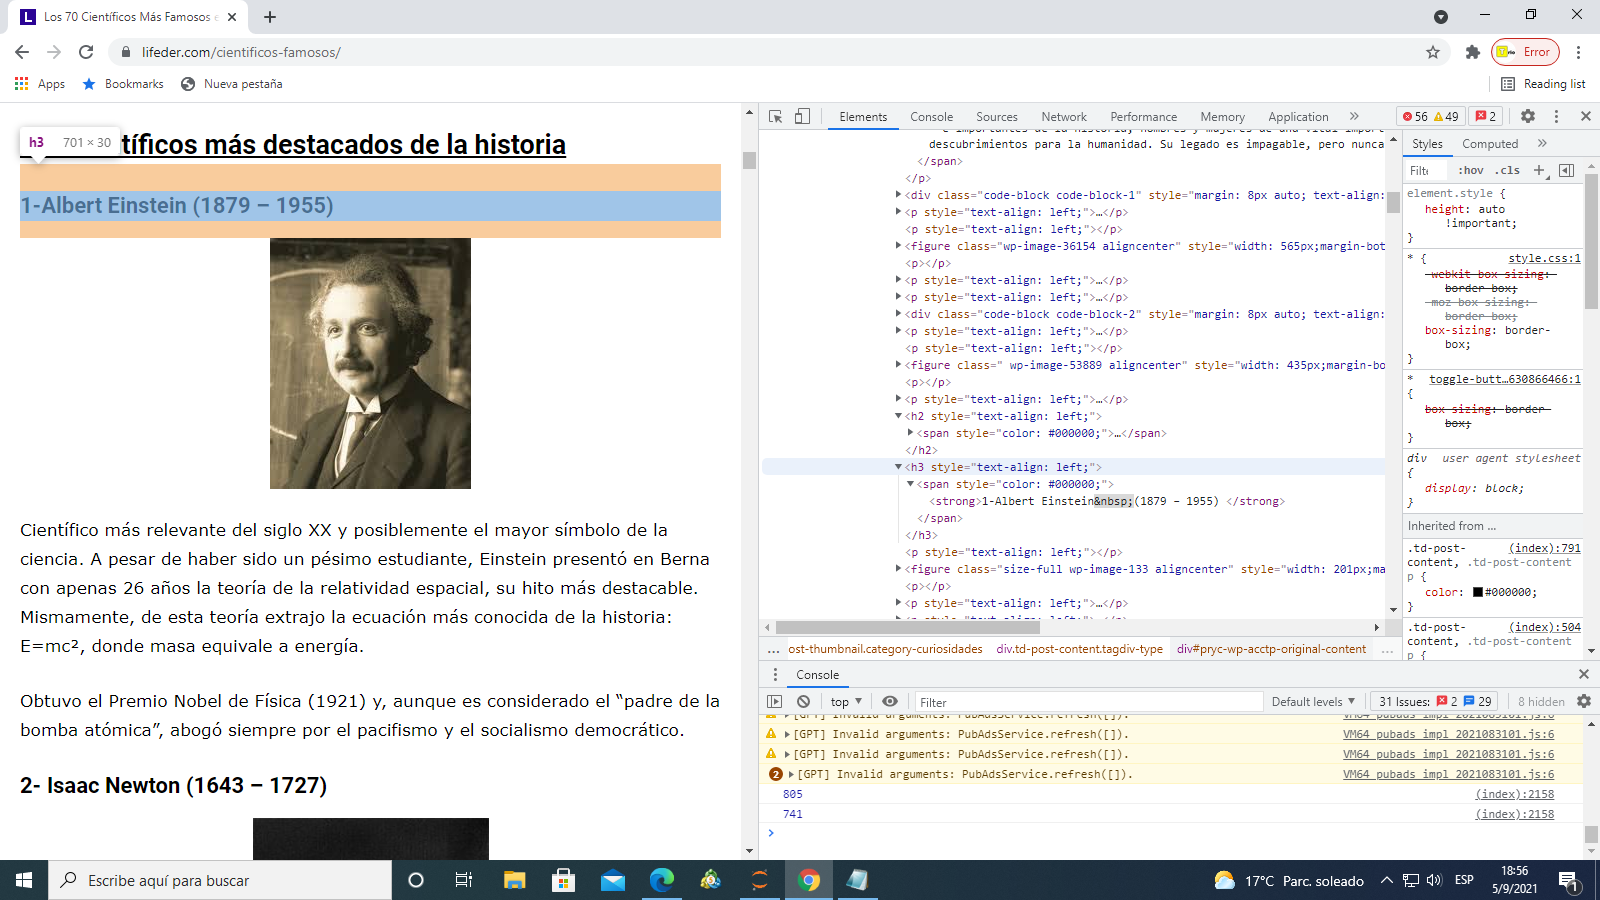

In [33]:
url_page = 'https://www.lifeder.com/cientificos-famosos/'
page = requests.get(url_page).text 
print(page)
soup = BeautifulSoup(page, "lxml")


<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<meta http-equiv="refresh" content="0">

<title>www.lifeder.com | 520: Web server is returning an unknown error</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge,chrome=1" />
<meta name="robots" content="noindex, nofollow" />
<meta name="viewport" content="width=device-width,initial-scale=1" />
<link rel="stylesheet" id="cf_styles-css" href="/cdn-cgi/styles/main.css" type="text/css" media="screen,projection" />


</head>
<body>
<div id="cf-wrapper">

    

    <div id="cf-error-details" class="p-0">
        <header class="mx-auto pt-10 lg:pt-6 lg:px-8 w-240 lg:w-full

In [34]:
contenido = soup.find('div', attrs={'strong': '1'})
print(contenido)
#items = contenido.find('h3')
#for item in items:
#    print(item)

None
